# Flipping Out
### An exploration of large-scale, simulated coin-flipping

In [1]:
import random
import math
import statistics as st
import matplotlib.pyplot as plt

In [50]:
%matplotlib inline
# IPython Notebook–specific; needed to show plots in the notebook

### Where It All Starts
We start by defining the "simple" function to simulate a coin flip. `flip_coin()` relies on the random library's `choice` function.

In [3]:
def flip_coin():
    return random.choice([0,1])

Using the above as the core, the below function runs a simulation of _n_ flips and returns (1) the total differential of heads to tails at the observation points, (2) the ratio of heads at the observation points, and (3) the observation points (which are 2<sup>0</sup>, 2<sup>1</sup>, 2<sup>2</sup>, 2<sup>3</sup>, ... n).
##### Note: It is possible to divide by zero when calculating the ratio of heads to tails (when a tails has not occurred); in this case, the ratio is returned as 1.

In [4]:
def n_flip_sim(n=2**16):
    num_heads = 0
    log_2_diff = []
    log_2_ratio = []
    ret_expos = []
    
    # Identify how many powers of 2 will be needed
    m = int(n)
    count = 0
    while m >= 1:
        m = m//2
        count += 1
    
    expos_of_2 = [2**y for y in range(count)]
    flips = [flip_coin() for _ in range(n)]
    for idx, flip in enumerate(flips):
        if flip == 0:
            num_heads += 1
        if idx in expos_of_2 or idx == n - 1:
            log_2_diff.append(num_heads - (idx - num_heads))
            if idx - num_heads != 0:
                log_2_ratio.append(num_heads / (idx - num_heads))
            else:
                log_2_ratio.append(1)
    ret_expos = expos_of_2[:(len(log_2_diff) - 1)]
    ret_expos.append(n)
    return log_2_diff, log_2_ratio, ret_expos
    

In [5]:
diffs, ratios, expos_of_2 = n_flip_sim()
# The below are commented out because they will produce long lists with large datasets
# You can try uncommenting to see what happens with smaller datasets
# print(diffs)
# print(expos_of_2)
# print(ratios)

### Plotting: What Do You See?

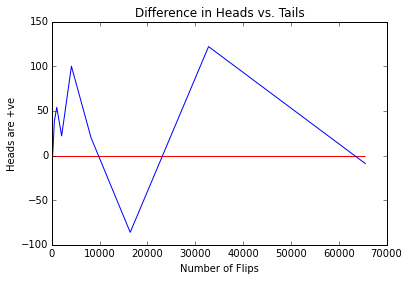

In [6]:
plt.plot(expos_of_2, diffs)
plt.title('Difference in Heads vs. Tails')
plt.ylabel('Heads are +ve')
plt.xlabel('Number of Flips')
plt.hlines(0, xmin=0, xmax=expos_of_2[-1], color='red')
plt.show()

Plotting our resulting "difference" data from the above `n_flip_sim()` function shows that the total variation can wander around as the number of flips increases.

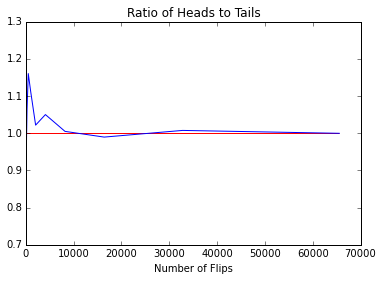

In [8]:
plt.plot(expos_of_2, ratios)
plt.hlines(1, xmin=0, xmax=expos_of_2[-1], color='red')
plt.title('Ratio of Heads to Tails')
plt.xlabel('Number of Flips')
plt.ylim(0.7,1.3)
plt.show()

Plotting the ratio of heads to tails shows that the overall variation is approaches the expected ratio of 1:1 as the number of flips gets higher.

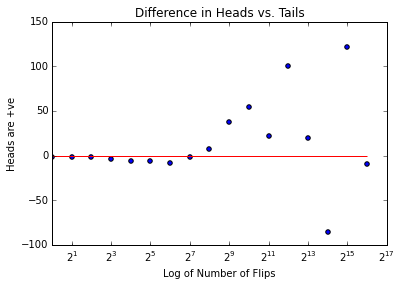

In [52]:
plt.scatter(expos_of_2, diffs)
plt.xscale('log', basex=2)
plt.xlim(-10,)
plt.title('Difference in Heads vs. Tails')
plt.ylabel('Heads are +ve')
plt.xlabel('Log of Number of Flips')
plt.hlines(0, 0, 2**16, color='red')
plt.show()

With the log<sub>2</sub> plot, it is easier to see how larger variations can build up as the number of overall flips increases. When you take into account the number of flips involved, the magnitude of the variation is remarkably small. 100/2<sup>14</sup> = 0.6103515625%

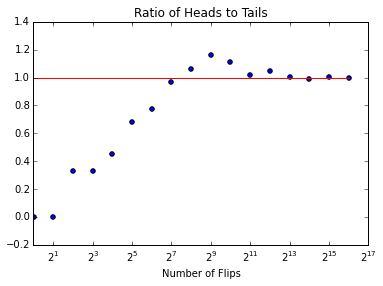

In [10]:
plt.scatter(expos_of_2, ratios)
plt.xscale('log', basex=2)
plt.xlim(-10,)
plt.hlines(1, xmin=0, xmax=expos_of_2[-1], color='red')
plt.title('Ratio of Heads to Tails')
plt.xlabel('Number of Flips')
plt.show()

Depending on the data generated, this can give surprising results for a low number of flips. We see a convergence at the expected ratio of 1:1 at a high number of flips, but with a low number of flips (e.g., 100), the ratio can be significantly different.

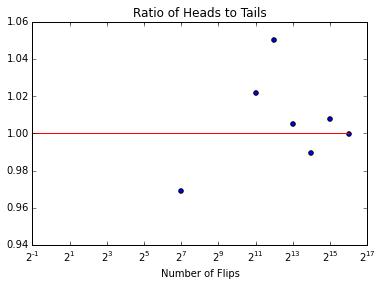

In [11]:
plt.scatter(expos_of_2, ratios)
plt.xscale('log', basex=2)
plt.ylim(0.94, 1.06)
plt.hlines(1, xmin=0, xmax=expos_of_2[-1], color='red')
plt.title('Ratio of Heads to Tails')
plt.xlabel('Number of Flips')
plt.show()

This zoomed-in view shows that after about 2<sup>11</sup> flips, we settle in very close to the ideal 1:1 ratio of heads to tails.

### Let's Look at How Comparable Simulations Differ
The below function runs 20 trials of 2<sup>16</sup> flips each.

In [12]:
def multiple_flip_trials(num_trials=20, n=2**16):
    trial_diffs = []
    trial_ratios = []
    expos_of_2 = []
    for t_num in range(num_trials):
        this_diffs = []
        this_ratios = []
        this_diffs, this_ratios, expos_of_2 = n_flip_sim(n)
        trial_diffs.append(this_diffs)
        trial_ratios.append(this_ratios)
    return trial_diffs, trial_ratios, expos_of_2

In [13]:
mft_data = multiple_flip_trials()

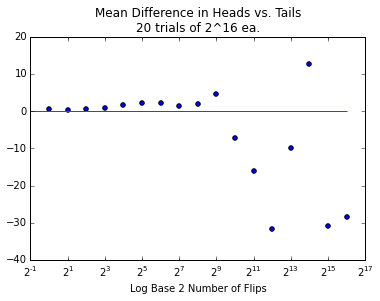

In [14]:
plt.scatter(mft_data[2], [st.mean(x) for x in list(zip(*mft_data[0]))])
plt.xscale('log', basex=2)
plt.title('Mean Difference in Heads vs. Tails\n20 trials of 2^16 ea.')
plt.xlabel('Log Base 2 Number of Flips')
plt.hlines(0, 0, mft_data[2][-1], color='red')
plt.show()


It is interesting to see that even at 2<sup>15</sup> (32768) simulated flips, the mean of the 20-trial aggregate can be farily large (>60). Compared to a single trial—which can see a difference of several hundred at 2<sup>15</sup> flips—the 20-trial aggregate mean is much closer to 0.

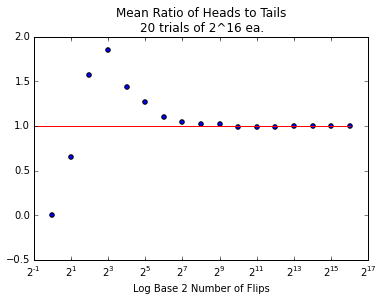

In [15]:
plt.scatter(mft_data[2], [st.mean(x) for x in list(zip(*mft_data[1]))])
plt.xscale('log', basex=2)
plt.title('Mean Ratio of Heads to Tails\n20 trials of 2^16 ea.')
plt.xlabel('Log Base 2 Number of Flips')
plt.hlines(1, 0, mft_data[2][-1], color='red')
plt.show()

Once the number of flips reaches about 2<sup>5</sup>, the ratio of heads to tails settles in very close to 1:1. See below graph for a zoomed-in view of just how close it gets.

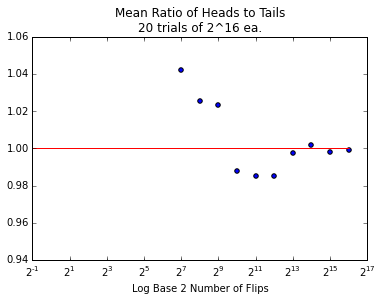

In [16]:
plt.scatter(mft_data[2], [st.mean(x) for x in list(zip(*mft_data[1]))])
plt.xscale('log', basex=2)
plt.title('Mean Ratio of Heads to Tails\n20 trials of 2^16 ea.')
plt.xlabel('Log Base 2 Number of Flips')
plt.hlines(1, 0, mft_data[2][-1], color='red')
# plt.xlim(2**5, 2**16)
plt.ylim(0.94, 1.06)
plt.show()

This zoomed-in version of the mean ratio plot for the 20-trial aggregate really shows off just how close we get to the 1:1 ideal. For a single 2<sup>16</sup> trial, we saw this sort of convergence only once we got to around 2<sup>12</sup> flips—here we see a similar level of convergence around 2<sup>7</sup>–2<sup>8</sup>. With a 20-trial mean, we'd expect a slightly greater than 2<sup>4</sup> reduction in the number of flips to achieve similar results. This seems to be the case.

In [17]:
trials_100k_100 = multiple_flip_trials(100000, 100)

In [39]:
final_100k_100_head_to_total_ratio = [0.5 + trials_100k_100[0][x][-1] / (2* 100) for x in range(100000)]

diff = heads - (total - heads)

diff = heads - total + heads

diff + total = 2 * heads

(diff + total)/2 = heads

(diff + total)/(2 * total) = heads / total

1/2 + diff / (2 * total) = heads / total

In the above, this is 0.5 + diff / (2 * 100)

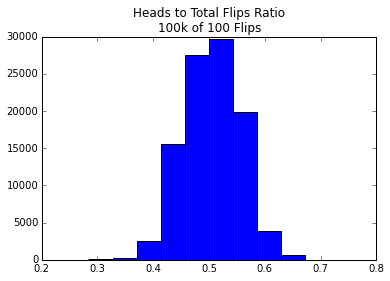

In [40]:
plt.hist(final_100k_100_head_to_total_ratio)
plt.title('Heads to Total Flips Ratio\n100k of 100 Flips')
plt.show()

The distribution around the expected mean looks like a traditional gaussian distribution. This is unsurprising, as we expect truly random results. The standard deviation for this data is 0.05005018881207144.

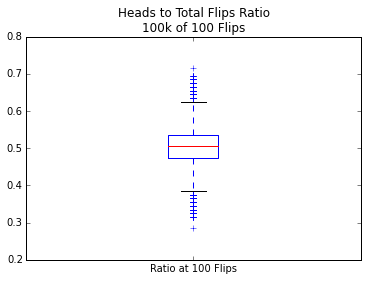

In [45]:
plt.boxplot(final_100k_100_head_to_total_ratio)
plt.title('Heads to Total Flips Ratio\n100k of 100 Flips')
plt.xticks([1],['Ratio at 100 Flips'])
plt.show()

The variation from the expected 0.5 mean is actually pretty large here. you can see that values near to 0.7 and 0.3 were in the set.

In [46]:
trials_100k_1000 = multiple_flip_trials(100000, 1000)

In [53]:
final_100k_1000_head_to_total_ratio = [0.5 + trials_100k_1000[0][x][-1] / (2* 1000) for x in range(100000)]

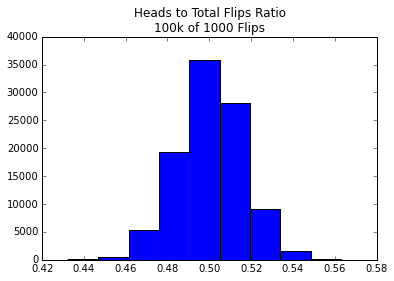

In [59]:
plt.hist(final_100k_1000_head_to_total_ratio)
plt.title('Heads to Total Flips Ratio\n100k of 1000 Flips')
plt.show()

Although the shape of this distribution is similar to that of the 100-flip trials, the standard deviation of the 100k set is only 0.01579053652951788 as compared to 0.05005018881207144. This is a significant improvement. Note that the edges of the distribution disappear from the graph around 0.44 here as opposed to 0.3 for the 100-flip trials.

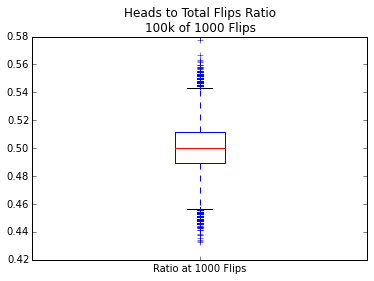

In [55]:
plt.boxplot(final_100k_1000_head_to_total_ratio)
plt.title('Heads to Total Flips Ratio\n100k of 1000 Flips')
plt.xticks([1],['Ratio at 1000 Flips'])
plt.show()

As in the histogram above, the 1000-flip trials resulted in a much tighter distribution around the expected 0.5 heads-to-total ratio. The edges of the distribution are ~0.56 and ~0.43, which is much better than the ~0.7 and ~.3 for the 100-flip trials.

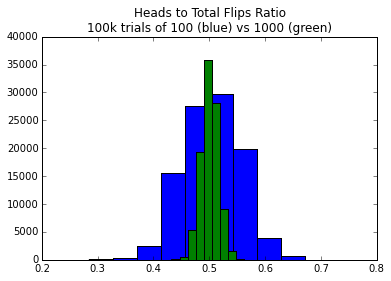

In [64]:
plt.hist(final_100k_100_head_to_total_ratio)
plt.hist(final_100k_1000_head_to_total_ratio)
plt.title('Heads to Total Flips Ratio\n100k trials of 100 (blue) vs 1000 (green)')
plt.show()

From this perspective, it is easy to see how improved the 1000-flip trials are in comparison to the 100-flip trials.